In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e10/sample_submission.csv
/kaggle/input/playground-series-s5e10/train.csv
/kaggle/input/playground-series-s5e10/test.csv


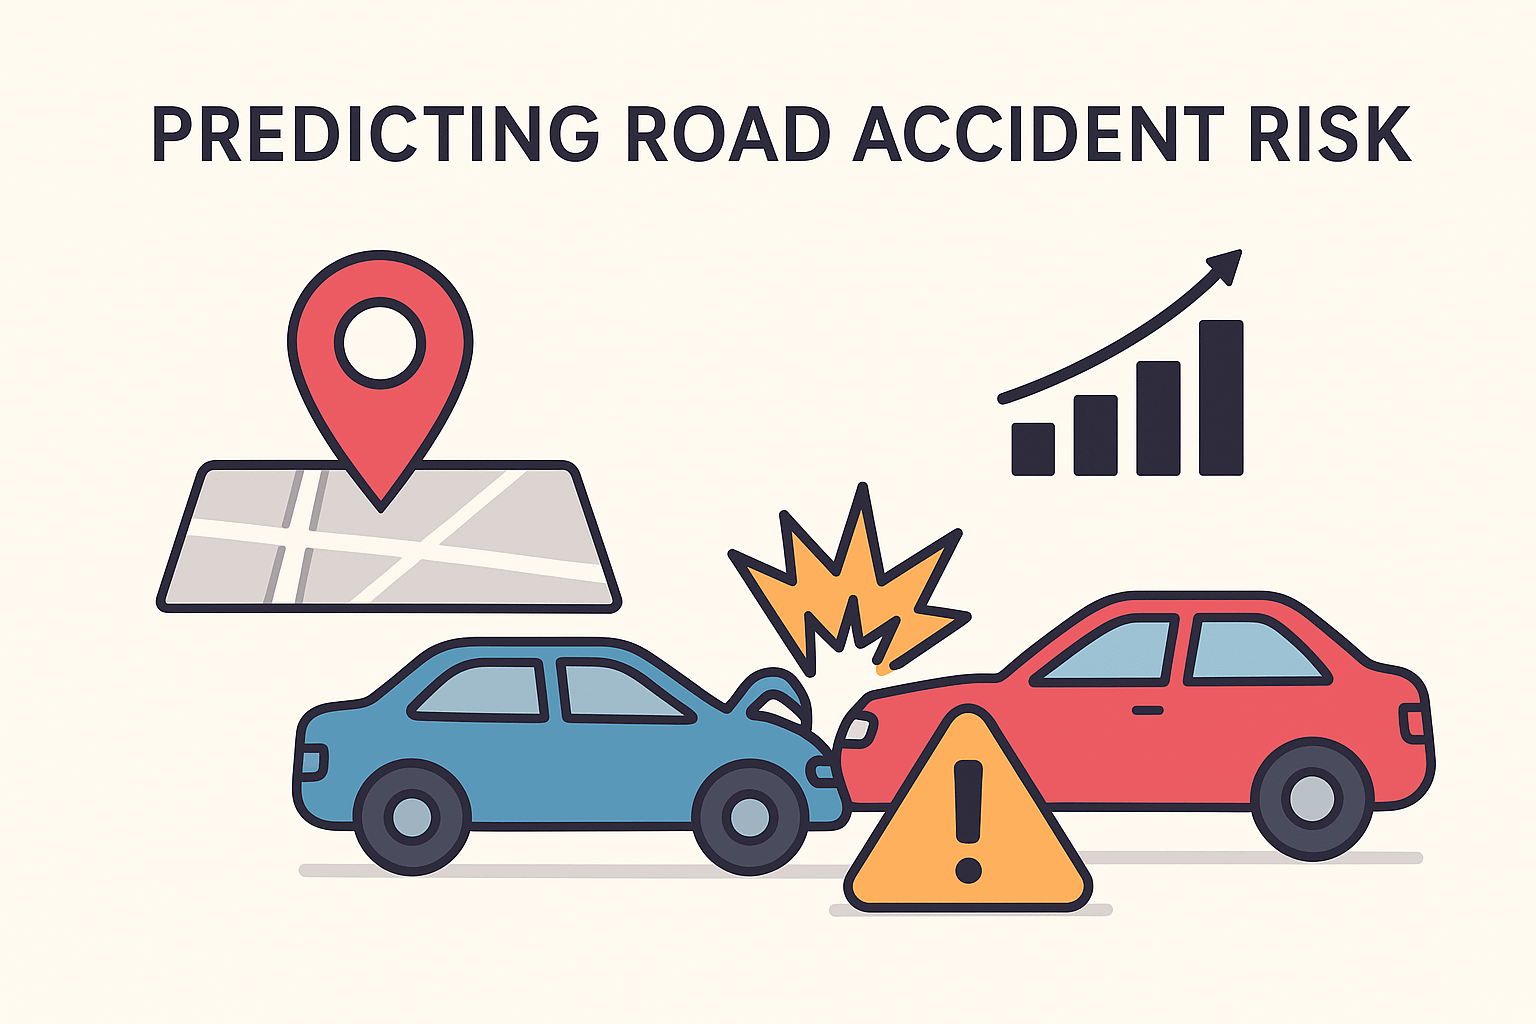

# Library loading

About Original Dataset

This synthetic dataset simulates real-world road conditions and associated accident risk probabilities. It has been generated to support machine learning tasks focused on predicting accident-prone road segments based on environmental, infrastructural, and temporal variables.

The dataset is entirely simulated using randomized distributions and domain-informed logic. It is shared under the CC0 Public Domain license, making it free for anyone to use, remix, or build upon

🎯 Use Case
The primary use case is training machine learning models to predict the likelihood of accidents on different types of roads using features such as:

Road curvature and number of lanes
Weather and lighting conditions
Presence of road signs
Holiday or school season flags
Speed limits, time of day, and more
You can apply regression or classification techniques, test feature importance, and explore model interpretability techniques like SHAP or LIME.

💡 Inspiration
This dataset can be used for:

Building and evaluating risk prediction models
Feature engineering and selection
Synthetic data testing and augmentation
Public safety prototypes or urban planning simulations


https://www.kaggle.com/datasets/ianktoo/simulated-roads-accident-data/

In [2]:
# !pip install --upgrade pip setuptools wheel
# !python -m pip install --upgrade pip
# !pip cache purge
# !pip install --upgrade --quiet scipy scikit-learn
# !pip install --upgrade --quiet numpy==1.26.4

# pip install --upgrade numpy scipy
# !pip uninstall scikit-learn
# !pip install scikit-learn
# !pip install pandas-profiling

In [3]:
# from ydata_profiling import ProfileReport

In [4]:
train = pd.read_csv('/kaggle/input/playground-series-s5e10/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e10/test.csv')

# Pandas Profiling Report

Great report for the beginning of the exploratory data analysis. Trás información como medidas de tendencia central, dispersão, tipo de dato são as variables, cardinalidade e otros dados estatísticos éssentials.

Ótimo relatório para início de análise exploratória de dados. Trás informações como medidas de tendência central, dispersão, tipo de dado são as variáveis, cardinalidade e outros dados estatísticos essenciais.

In [5]:
# from ydata_profiling import ProfileReport

# profile = ProfileReport(train, title="Relatório do Dataset", explorative=True)
# profile.to_file("relatorio.html")

In [6]:
# profile = ProfileReport(
#     train.sample(50000, random_state=42),  # usa só uma amostra
#     title="Relatório do Dataset (amostra)",
#     explorative=True
# )
# profile.to_notebook_iframe()

Let's check for null columns and the data type:

Vamos verificar se há colunas nulas e o tipo de dados:

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

There is no null cell in this dataset.

Não há nenhuma célula nula neste conjunto de dados.

Let's look in more detail by adding up the empty values ​​in each cell.

In [8]:
train.isnull().sum()

id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64

The describe method brings the central measurement statistical data.

O método describe que exibe os dados estatísticos de medida central.

In [9]:
train.describe()

,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,258876.500000,2.491511,0.488719,46.112575,1.187970,0.352377
std,149462.849974,1.120434,0.272563,15.788521,0.895961,0.166417
min,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000
25%,129438.250000,1.000000,0.260000,35.000000,1.000000,0.230000
50%,258876.500000,2.000000,0.510000,45.000000,1.000000,0.340000
75%,388314.750000,3.000000,0.710000,60.000000,2.000000,0.460000
max,517753.000000,4.000000,1.000000,70.000000,7.000000,1.000000


I tried looking at the unique values ​​in each column, but there are too many. So, it's not worth looking at individual maneuvers as unique values.

Tentei olhar os valores únicos de cada coluna mas são muitos valores. Então não compensa olhar para manobras isoladas como valores únicos.

In [10]:
train['accident_risk'].unique()

array([0.13, 0.35, 0.3 , 0.21, 0.56, 0.61, 0.2 , 0.16, 0.18, 0.15, 0.06,
       0.32, 0.37, 0.28, 0.17, 0.39, 0.23, 0.51, 0.63, 0.79, 0.34, 0.29,
       0.68, 0.4 , 0.24, 0.33, 0.41, 0.38, 0.  , 0.47, 0.31, 0.26, 0.19,
       0.44, 0.49, 0.73, 0.07, 0.57, 0.48, 0.12, 0.5 , 0.52, 0.25, 0.6 ,
       0.11, 0.58, 0.46, 0.59, 0.22, 0.36, 0.42, 0.43, 0.84, 0.45, 0.64,
       0.27, 0.54, 0.14, 0.53, 0.77, 0.05, 0.69, 0.1 , 0.8 , 0.55, 0.08,
       0.04, 0.09, 0.02, 0.78, 0.81, 0.71, 0.92, 0.62, 0.82, 0.65, 0.75,
       0.72, 0.66, 0.67, 0.74, 0.01, 0.88, 0.87, 0.7 , 0.86, 0.03, 0.76,
       0.83, 1.  , 0.91, 0.85, 0.94, 0.97, 0.89, 0.93, 0.9 , 0.96])

It's important to understand whether the data is normalized or not. If it isn't, analyze why it isn't normalized. Working with denormalized data requires caution. The sample may be inadequate. It may be biased and may not generalize well to a model.

In [11]:
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_normal_distribution(df, column, bins=50):
    """
    Plota a distribuição de uma coluna de um DataFrame 
    com a curva da Normal ajustada.

    Args:
        df (pd.DataFrame): dataset
        column (str): nome da coluna numérica
        bins (int): quantidade de intervalos do histograma
    """
    data = df[column].dropna()
    mu, std = data.mean(), data.std()

    # Histograma
    plt.figure(figsize=(8,5))
    plt.hist(data, bins=bins, density=True, alpha=0.6, color='skyblue', edgecolor='black')

    # Curva normal ajustada
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 200)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'r', linewidth=2)

    plt.title(f"Distribuição de {column}\nMédia = {mu:.2f}, Desvio Padrão = {std:.2f}")
    plt.xlabel(column)
    plt.ylabel("Densidade")
    plt.show()

In [12]:
train.columns

Index(['id', 'road_type', 'num_lanes', 'curvature', 'speed_limit', 'lighting',
       'weather', 'road_signs_present', 'public_road', 'time_of_day',
       'holiday', 'school_season', 'num_reported_accidents', 'accident_risk'],
      dtype='object')

In [13]:
# for columns in train.columns:
#     plot_normal_distribution(train, columns, bins=50)

# Processamento de colunas

In [14]:
from sklearn.decomposition import PCA

In [15]:
train.columns[ train.dtypes == object ]

Index(['road_type', 'lighting', 'weather', 'time_of_day'], dtype='object')

In [16]:
train[ train.columns[ train.dtypes == object ] ]['road_type'].unique()

array(['urban', 'rural', 'highway'], dtype=object)

In [17]:
pd.get_dummies(train[ 'road_type' ])

,highway,rural,urban
0,False,False,True
1,False,False,True
2,False,True,False
3,True,False,False
4,False,True,False
...,...,...,...
517749,True,False,False
517750,False,True,False
517751,False,False,True
517752,True,False,False


In [18]:
type(train)

pandas.core.frame.DataFrame

In [19]:
train = pd.concat( [ train , pd.get_dummies(train[ [ 'road_type', 'lighting', 'weather', 'time_of_day' ] ]) ], axis=1 )

In [20]:
test = pd.concat( [ test , pd.get_dummies(test[ [ 'road_type', 'lighting', 'weather', 'time_of_day' ] ]) ], axis=1 )

In [21]:
train.columns

Index(['id', 'road_type', 'num_lanes', 'curvature', 'speed_limit', 'lighting',
       'weather', 'road_signs_present', 'public_road', 'time_of_day',
       'holiday', 'school_season', 'num_reported_accidents', 'accident_risk',
       'road_type_highway', 'road_type_rural', 'road_type_urban',
       'lighting_daylight', 'lighting_dim', 'lighting_night', 'weather_clear',
       'weather_foggy', 'weather_rainy', 'time_of_day_afternoon',
       'time_of_day_evening', 'time_of_day_morning'],
      dtype='object')

In [22]:
train.loc[:,train.dtypes=='object'].columns

Index(['road_type', 'lighting', 'weather', 'time_of_day'], dtype='object')

In [23]:
train = train.drop(train.loc[:,train.dtypes=='object'].columns, axis=1)
train

,id,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,accident_risk,...,road_type_urban,lighting_daylight,lighting_dim,lighting_night,weather_clear,weather_foggy,weather_rainy,time_of_day_afternoon,time_of_day_evening,time_of_day_morning
0,0,2,0.06,35,False,True,False,True,1,0.13,...,True,True,False,False,False,False,True,True,False,False
1,1,4,0.99,35,True,False,True,True,0,0.35,...,True,True,False,False,True,False,False,False,True,False
2,2,4,0.63,70,False,True,True,False,2,0.30,...,False,False,True,False,True,False,False,False,False,True
3,3,4,0.07,35,True,True,False,False,1,0.21,...,False,False,True,False,False,False,True,False,False,True
4,4,1,0.58,60,False,False,True,False,1,0.56,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,517749,4,0.10,70,True,True,False,False,2,0.32,...,False,True,False,False,False,True,False,True,False,False
517750,517750,4,0.47,35,True,True,False,False,1,0.26,...,False,True,False,False,False,False,True,False,False,True
517751,517751,4,0.62,25,False,False,False,True,0,0.19,...,True,True,False,False,False,True,False,True,False,False
517752,517752,3,0.63,25,True,False,True,True,3,0.51,...,False,False,False,True,True,False,False,True,False,False


In [24]:
test = test.drop(test.loc[:,test.dtypes=='object'].columns, axis=1)
test

,id,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,road_type_highway,...,road_type_urban,lighting_daylight,lighting_dim,lighting_night,weather_clear,weather_foggy,weather_rainy,time_of_day_afternoon,time_of_day_evening,time_of_day_morning
0,517754,2,0.34,45,True,True,True,True,1,True,...,False,False,False,True,True,False,False,True,False,False
1,517755,3,0.04,45,True,False,True,False,0,False,...,True,False,True,False,False,True,False,True,False,False
2,517756,2,0.59,35,True,False,True,True,1,False,...,True,False,True,False,True,False,False,True,False,False
3,517757,4,0.95,35,False,False,False,False,2,False,...,False,True,False,False,False,False,True,True,False,False
4,517758,2,0.86,35,True,False,False,True,3,True,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172580,690334,2,0.01,45,False,False,True,True,2,False,...,False,False,True,False,False,False,True,True,False,False
172581,690335,1,0.74,70,False,True,False,False,2,False,...,False,True,False,False,False,True,False,True,False,False
172582,690336,2,0.14,70,False,False,True,True,1,False,...,True,False,True,False,True,False,False,False,True,False
172583,690337,1,0.09,45,True,True,False,True,0,False,...,True,True,False,False,False,True,False,False,False,True


In [25]:
train.dtypes == 'bool'

id                        False
num_lanes                 False
curvature                 False
speed_limit               False
road_signs_present         True
public_road                True
holiday                    True
school_season              True
num_reported_accidents    False
accident_risk             False
road_type_highway          True
road_type_rural            True
road_type_urban            True
lighting_daylight          True
lighting_dim               True
lighting_night             True
weather_clear              True
weather_foggy              True
weather_rainy              True
time_of_day_afternoon      True
time_of_day_evening        True
time_of_day_morning        True
dtype: bool

We need to compare to see if the columns are being converted and if any columns are being removed from the Dataframe.

Precisamos comparar para saber se as colunas estão sendo convertidas e se alguma coluna esta´sendo retirada do Dataframe.

In [26]:
train.shape

(517754, 22)

In [27]:
train[ train.loc[:,train.dtypes=='bool'].columns ] = train[ train.loc[:,train.dtypes=='bool'].columns ].replace({True:1, False:0})
train

/tmp/ipykernel_13/1277729068.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[ train.loc[:,train.dtypes=='bool'].columns ] = train[ train.loc[:,train.dtypes=='bool'].columns ].replace({True:1, False:0})


,id,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,accident_risk,...,road_type_urban,lighting_daylight,lighting_dim,lighting_night,weather_clear,weather_foggy,weather_rainy,time_of_day_afternoon,time_of_day_evening,time_of_day_morning
0,0,2,0.06,35,0,1,0,1,1,0.13,...,1,1,0,0,0,0,1,1,0,0
1,1,4,0.99,35,1,0,1,1,0,0.35,...,1,1,0,0,1,0,0,0,1,0
2,2,4,0.63,70,0,1,1,0,2,0.30,...,0,0,1,0,1,0,0,0,0,1
3,3,4,0.07,35,1,1,0,0,1,0.21,...,0,0,1,0,0,0,1,0,0,1
4,4,1,0.58,60,0,0,1,0,1,0.56,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,517749,4,0.10,70,1,1,0,0,2,0.32,...,0,1,0,0,0,1,0,1,0,0
517750,517750,4,0.47,35,1,1,0,0,1,0.26,...,0,1,0,0,0,0,1,0,0,1
517751,517751,4,0.62,25,0,0,0,1,0,0.19,...,1,1,0,0,0,1,0,1,0,0
517752,517752,3,0.63,25,1,0,1,1,3,0.51,...,0,0,0,1,1,0,0,1,0,0


In [28]:
test[ test.loc[:,test.dtypes=='bool'].columns ] = test[ test.loc[:,test.dtypes=='bool'].columns ].replace({True:1, False:0})
test

/tmp/ipykernel_13/3398128443.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test[ test.loc[:,test.dtypes=='bool'].columns ] = test[ test.loc[:,test.dtypes=='bool'].columns ].replace({True:1, False:0})


,id,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,road_type_highway,...,road_type_urban,lighting_daylight,lighting_dim,lighting_night,weather_clear,weather_foggy,weather_rainy,time_of_day_afternoon,time_of_day_evening,time_of_day_morning
0,517754,2,0.34,45,1,1,1,1,1,1,...,0,0,0,1,1,0,0,1,0,0
1,517755,3,0.04,45,1,0,1,0,0,0,...,1,0,1,0,0,1,0,1,0,0
2,517756,2,0.59,35,1,0,1,1,1,0,...,1,0,1,0,1,0,0,1,0,0
3,517757,4,0.95,35,0,0,0,0,2,0,...,0,1,0,0,0,0,1,1,0,0
4,517758,2,0.86,35,1,0,0,1,3,1,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172580,690334,2,0.01,45,0,0,1,1,2,0,...,0,0,1,0,0,0,1,1,0,0
172581,690335,1,0.74,70,0,1,0,0,2,0,...,0,1,0,0,0,1,0,1,0,0
172582,690336,2,0.14,70,0,0,1,1,1,0,...,1,0,1,0,1,0,0,0,1,0
172583,690337,1,0.09,45,1,1,0,1,0,0,...,1,1,0,0,0,1,0,0,0,1


In [29]:
train.shape

(517754, 22)

In [30]:
X = train[train.columns]
X

,id,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,accident_risk,...,road_type_urban,lighting_daylight,lighting_dim,lighting_night,weather_clear,weather_foggy,weather_rainy,time_of_day_afternoon,time_of_day_evening,time_of_day_morning
0,0,2,0.06,35,0,1,0,1,1,0.13,...,1,1,0,0,0,0,1,1,0,0
1,1,4,0.99,35,1,0,1,1,0,0.35,...,1,1,0,0,1,0,0,0,1,0
2,2,4,0.63,70,0,1,1,0,2,0.30,...,0,0,1,0,1,0,0,0,0,1
3,3,4,0.07,35,1,1,0,0,1,0.21,...,0,0,1,0,0,0,1,0,0,1
4,4,1,0.58,60,0,0,1,0,1,0.56,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,517749,4,0.10,70,1,1,0,0,2,0.32,...,0,1,0,0,0,1,0,1,0,0
517750,517750,4,0.47,35,1,1,0,0,1,0.26,...,0,1,0,0,0,0,1,0,0,1
517751,517751,4,0.62,25,0,0,0,1,0,0.19,...,1,1,0,0,0,1,0,1,0,0
517752,517752,3,0.63,25,1,0,1,1,3,0.51,...,0,0,0,1,1,0,0,1,0,0


In [31]:
# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA to the data and transform it
X_pca = pca.fit_transform(X)

print("Original data shape:", X.shape)
print("Transformed data shape (PCA):", X_pca.shape)
print("Explained variance ratio of each component:", pca.explained_variance_ratio_)

Original data shape: (517754, 22)
Transformed data shape (PCA): (517754, 2)
Explained variance ratio of each component: [9.99999989e-01 1.11592389e-08]


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt

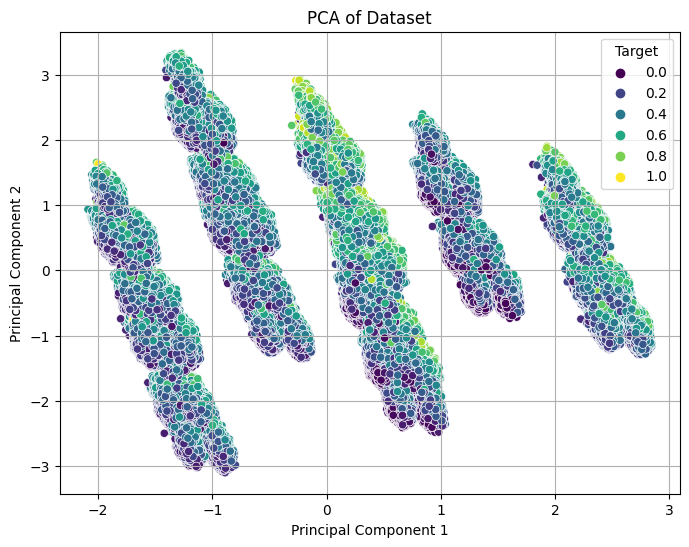

In [33]:
# Assuming 'data' is your original DataFrame and 'target_column' is your class label
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train.drop(columns=['accident_risk']))

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Target'] = train['accident_risk'] # Add the target column for coloring

# Visualize using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Target', data=pca_df, palette='viridis')
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

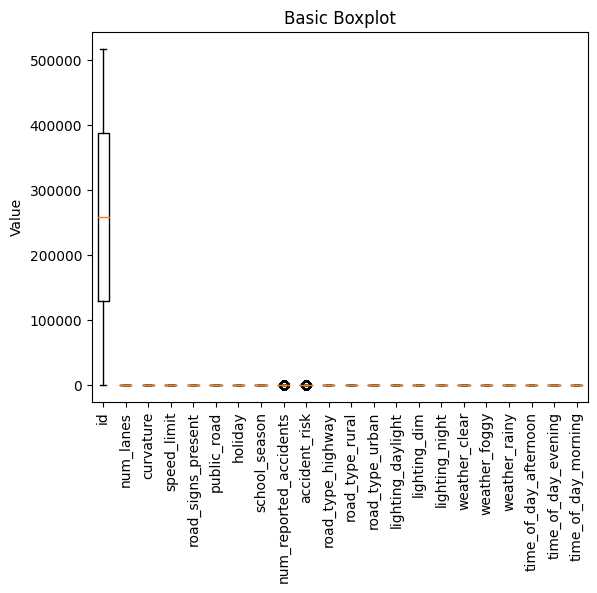

In [34]:
# Create a boxplot
plt.boxplot(train, labels=train.columns)
plt.title("Basic Boxplot")
plt.ylabel("Value")
plt.xticks(rotation=90)
plt.show()

In [35]:
train

,id,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,accident_risk,...,road_type_urban,lighting_daylight,lighting_dim,lighting_night,weather_clear,weather_foggy,weather_rainy,time_of_day_afternoon,time_of_day_evening,time_of_day_morning
0,0,2,0.06,35,0,1,0,1,1,0.13,...,1,1,0,0,0,0,1,1,0,0
1,1,4,0.99,35,1,0,1,1,0,0.35,...,1,1,0,0,1,0,0,0,1,0
2,2,4,0.63,70,0,1,1,0,2,0.30,...,0,0,1,0,1,0,0,0,0,1
3,3,4,0.07,35,1,1,0,0,1,0.21,...,0,0,1,0,0,0,1,0,0,1
4,4,1,0.58,60,0,0,1,0,1,0.56,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,517749,4,0.10,70,1,1,0,0,2,0.32,...,0,1,0,0,0,1,0,1,0,0
517750,517750,4,0.47,35,1,1,0,0,1,0.26,...,0,1,0,0,0,0,1,0,0,1
517751,517751,4,0.62,25,0,0,0,1,0,0.19,...,1,1,0,0,0,1,0,1,0,0
517752,517752,3,0.63,25,1,0,1,1,3,0.51,...,0,0,0,1,1,0,0,1,0,0


In [36]:
len(train.columns)

22

<Axes: >

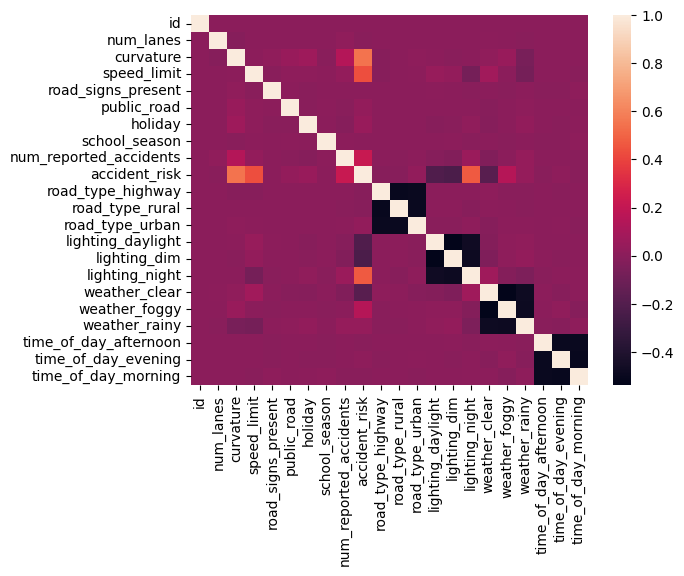

In [37]:
sns.heatmap(train.corr())

I will try to use strategies with deep learning and unsupervised algorithms.

But first, I'll normalize the data with a minmax scaler. This way, I can redistribute the data between the range 0 and 1.

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()
print(scaler.fit(train))

MinMaxScaler()


In [40]:
scaled_data = scaler.fit_transform(train)

In [41]:
scaled_data_test = scaler.fit_transform(test)

In [42]:
scaled_data

array([[0.00000000e+00, 3.33333333e-01, 6.00000000e-02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.93142290e-06, 1.00000000e+00, 9.90000000e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.86284580e-06, 1.00000000e+00, 6.30000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [9.99996137e-01, 1.00000000e+00, 6.20000000e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99998069e-01, 6.66666667e-01, 6.30000000e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.33333333e-01, 3.10000000e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [43]:
scaled_data = pd.DataFrame(scaled_data)
scaled_data

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.000000,0.333333,0.06,0.222222,0.0,1.0,0.0,1.0,0.142857,0.13,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.000002,1.000000,0.99,0.222222,1.0,0.0,1.0,1.0,0.000000,0.35,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.000004,1.000000,0.63,1.000000,0.0,1.0,1.0,0.0,0.285714,0.30,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.000006,1.000000,0.07,0.222222,1.0,1.0,0.0,0.0,0.142857,0.21,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.000008,0.000000,0.58,0.777778,0.0,0.0,1.0,0.0,0.142857,0.56,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,0.999992,1.000000,0.10,1.000000,1.0,1.0,0.0,0.0,0.285714,0.32,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
517750,0.999994,1.000000,0.47,0.222222,1.0,1.0,0.0,0.0,0.142857,0.26,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
517751,0.999996,1.000000,0.62,0.000000,0.0,0.0,0.0,1.0,0.000000,0.19,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
517752,0.999998,0.666667,0.63,0.000000,1.0,0.0,1.0,1.0,0.428571,0.51,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [44]:
scaled_data_test = pd.DataFrame(scaled_data_test)
scaled_data_test

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.000000,0.333333,0.34,0.444444,1.0,1.0,1.0,1.0,0.142857,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.000006,0.666667,0.04,0.444444,1.0,0.0,1.0,0.0,0.000000,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.000012,0.333333,0.59,0.222222,1.0,0.0,1.0,1.0,0.142857,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.000017,1.000000,0.95,0.222222,0.0,0.0,0.0,0.0,0.285714,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.000023,0.333333,0.86,0.222222,1.0,0.0,0.0,1.0,0.428571,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172580,0.999977,0.333333,0.01,0.444444,0.0,0.0,1.0,1.0,0.285714,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
172581,0.999983,0.000000,0.74,1.000000,0.0,1.0,0.0,0.0,0.285714,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
172582,0.999988,0.333333,0.14,1.000000,0.0,0.0,1.0,1.0,0.142857,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
172583,0.999994,0.000000,0.09,0.444444,1.0,1.0,0.0,1.0,0.000000,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


But first, I'll normalize the data with a minmax scaler. This way, I can redistribute the data between the range 0 and 1. 
This gives us a smoother scale. And it prevents outliers from forcing erroneous directions.

<Axes: >

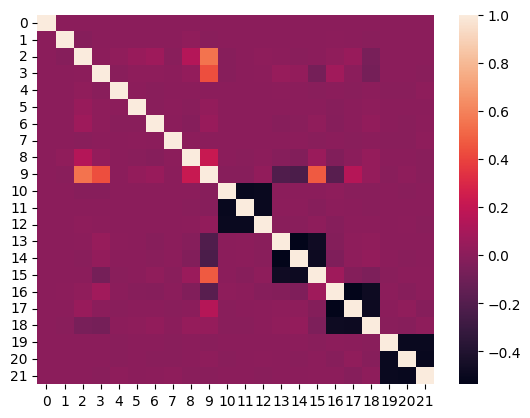

In [45]:
sns.heatmap(scaled_data.corr())

<Axes: >

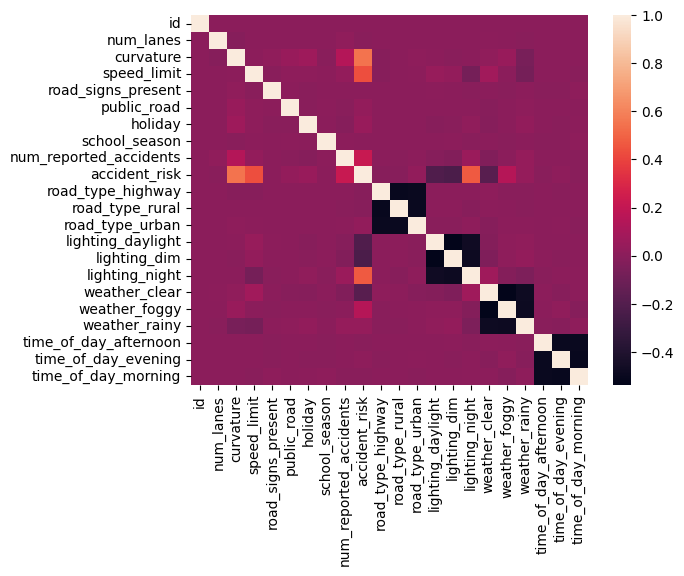

In [46]:
sns.heatmap(train.corr())

Let's try creating groups with kmeans, thus grouping the closest attributes.

In [47]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

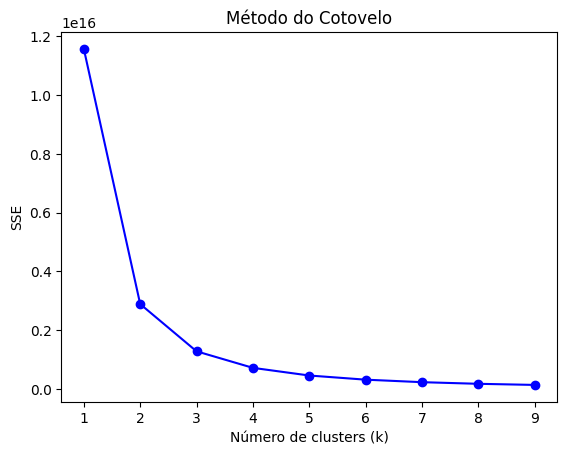

In [48]:
# Dados de exemplo

sse = []
k_values = range(1, 10)
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(train)
    sse.append(km.inertia_)  # SSE (inertia)

plt.plot(k_values, sse, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE')
plt.title('Método do Cotovelo')
plt.show()

In [49]:
# Create a KMeans object with 2 clusters
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)

In [50]:
# Fit the model to the data
kmeans.fit(train)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [51]:
scaled_data_test.columns

RangeIndex(start=0, stop=21, step=1)

In [52]:
scaled_data.columns

RangeIndex(start=0, stop=22, step=1)

In [53]:
# Get cluster labels for each data point
scaled_data['cluster'] = kmeans.fit_predict(scaled_data)

In [54]:
scaled_data = scaled_data.drop(columns='cluster')
scaled_data

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.000000,0.333333,0.06,0.222222,0.0,1.0,0.0,1.0,0.142857,0.13,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.000002,1.000000,0.99,0.222222,1.0,0.0,1.0,1.0,0.000000,0.35,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.000004,1.000000,0.63,1.000000,0.0,1.0,1.0,0.0,0.285714,0.30,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.000006,1.000000,0.07,0.222222,1.0,1.0,0.0,0.0,0.142857,0.21,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.000008,0.000000,0.58,0.777778,0.0,0.0,1.0,0.0,0.142857,0.56,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,0.999992,1.000000,0.10,1.000000,1.0,1.0,0.0,0.0,0.285714,0.32,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
517750,0.999994,1.000000,0.47,0.222222,1.0,1.0,0.0,0.0,0.142857,0.26,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
517751,0.999996,1.000000,0.62,0.000000,0.0,0.0,0.0,1.0,0.000000,0.19,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
517752,0.999998,0.666667,0.63,0.000000,1.0,0.0,1.0,1.0,0.428571,0.51,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [55]:
# Get cluster labels for each data point
scaled_data_test['cluster'] = kmeans.fit_predict(scaled_data_test)

In [56]:
scaled_data.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
dtype: object

In [57]:
scaled_data['cluster'] = kmeans.fit_predict(scaled_data)

In [58]:
print(f"Cluster labels: {scaled_data['cluster']}")

Cluster labels: 0         0
1         0
2         2
3         2
4         0
         ..
517749    0
517750    0
517751    0
517752    1
517753    2
Name: cluster, Length: 517754, dtype: int32


In [59]:
print(f"Cluster labels: {scaled_data_test['cluster']}")

Cluster labels: 0         0
1         2
2         2
3         1
4         1
         ..
172580    2
172581    1
172582    2
172583    1
172584    0
Name: cluster, Length: 172585, dtype: int32


In [60]:
scaled_data.cluster.unique()

array([0, 2, 1], dtype=int32)

In [61]:
train['cluster'] = scaled_data.cluster.values

In [62]:
test['cluster'] = scaled_data_test.cluster.values

In [63]:
# sns.heatmap(train.corr())

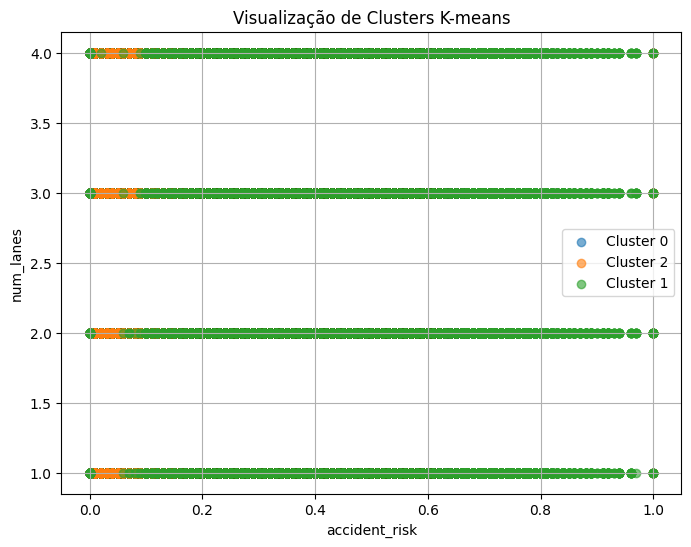

In [64]:
# --- Gráfico de dispersão com cores para clusters ---
plt.figure(figsize=(8,6))
for c in train['cluster'].unique():
    cluster_points = train[train['cluster'] == c]
    plt.scatter(cluster_points['accident_risk'], cluster_points['num_lanes'], label=f'Cluster {c}', alpha=0.6)

plt.xlabel('accident_risk')
plt.ylabel('num_lanes')
plt.title('Visualização de Clusters K-means')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
train.isnull().sum()

id                        0
num_lanes                 0
curvature                 0
speed_limit               0
road_signs_present        0
public_road               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
road_type_highway         0
road_type_rural           0
road_type_urban           0
lighting_daylight         0
lighting_dim              0
lighting_night            0
weather_clear             0
weather_foggy             0
weather_rainy             0
time_of_day_afternoon     0
time_of_day_evening       0
time_of_day_morning       0
cluster                   0
dtype: int64

In [66]:
train['num_lanes']

0         2
1         4
2         4
3         4
4         1
         ..
517749    4
517750    4
517751    4
517752    3
517753    2
Name: num_lanes, Length: 517754, dtype: int64

In [67]:
# sns.pairplot(train)

Continue cleaning the dataset.

In [68]:
train['accident_risk'].unique().size

98

In [69]:
train.columns

Index(['id', 'num_lanes', 'curvature', 'speed_limit', 'road_signs_present',
       'public_road', 'holiday', 'school_season', 'num_reported_accidents',
       'accident_risk', 'road_type_highway', 'road_type_rural',
       'road_type_urban', 'lighting_daylight', 'lighting_dim',
       'lighting_night', 'weather_clear', 'weather_foggy', 'weather_rainy',
       'time_of_day_afternoon', 'time_of_day_evening', 'time_of_day_morning',
       'cluster'],
      dtype='object')

In [70]:
test.columns

Index(['id', 'num_lanes', 'curvature', 'speed_limit', 'road_signs_present',
       'public_road', 'holiday', 'school_season', 'num_reported_accidents',
       'road_type_highway', 'road_type_rural', 'road_type_urban',
       'lighting_daylight', 'lighting_dim', 'lighting_night', 'weather_clear',
       'weather_foggy', 'weather_rainy', 'time_of_day_afternoon',
       'time_of_day_evening', 'time_of_day_morning', 'cluster'],
      dtype='object')

In [71]:
train.shape

(517754, 23)

In [72]:
test.shape

(172585, 22)

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
y=train['accident_risk']
y

0         0.13
1         0.35
2         0.30
3         0.21
4         0.56
          ... 
517749    0.32
517750    0.26
517751    0.19
517752    0.51
517753    0.22
Name: accident_risk, Length: 517754, dtype: float64

In [76]:
X = train.iloc[:, 1:len(train.columns)]

In [77]:
train['id']

0              0
1              1
2              2
3              3
4              4
           ...  
517749    517749
517750    517750
517751    517751
517752    517752
517753    517753
Name: id, Length: 517754, dtype: int64

In [78]:
X = X.drop('accident_risk', axis='columns')

In [79]:
X

,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,road_type_highway,road_type_rural,...,lighting_daylight,lighting_dim,lighting_night,weather_clear,weather_foggy,weather_rainy,time_of_day_afternoon,time_of_day_evening,time_of_day_morning,cluster
0,2,0.06,35,0,1,0,1,1,0,0,...,1,0,0,0,0,1,1,0,0,0
1,4,0.99,35,1,0,1,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,4,0.63,70,0,1,1,0,2,0,1,...,0,1,0,1,0,0,0,0,1,2
3,4,0.07,35,1,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,2
4,1,0.58,60,0,0,1,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,4,0.10,70,1,1,0,0,2,1,0,...,1,0,0,0,1,0,1,0,0,0
517750,4,0.47,35,1,1,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0
517751,4,0.62,25,0,0,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,0
517752,3,0.63,25,1,0,1,1,3,1,0,...,0,0,1,1,0,0,1,0,0,1


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [81]:
X_train.columns

Index(['num_lanes', 'curvature', 'speed_limit', 'road_signs_present',
       'public_road', 'holiday', 'school_season', 'num_reported_accidents',
       'road_type_highway', 'road_type_rural', 'road_type_urban',
       'lighting_daylight', 'lighting_dim', 'lighting_night', 'weather_clear',
       'weather_foggy', 'weather_rainy', 'time_of_day_afternoon',
       'time_of_day_evening', 'time_of_day_morning', 'cluster'],
      dtype='object')

In [82]:
X_test.columns

Index(['num_lanes', 'curvature', 'speed_limit', 'road_signs_present',
       'public_road', 'holiday', 'school_season', 'num_reported_accidents',
       'road_type_highway', 'road_type_rural', 'road_type_urban',
       'lighting_daylight', 'lighting_dim', 'lighting_night', 'weather_clear',
       'weather_foggy', 'weather_rainy', 'time_of_day_afternoon',
       'time_of_day_evening', 'time_of_day_morning', 'cluster'],
      dtype='object')

In [83]:
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression

In [84]:
from sklearn.linear_model import LinearRegression

Now let's see which features are important in the model. This way, I can remove the others from the model.

Agora vamos ver quais features tem importância no modelo. Assim posso remover as outras do modelo.

In [85]:
model = LinearRegression()

In [86]:
model.fit(X_train,y_train)

LinearRegression()

In [87]:
result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

In [88]:
# 📈 Criar DataFrame ordenado pela importância
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": result.importances_mean
}).sort_values(by="Importance", ascending=False)

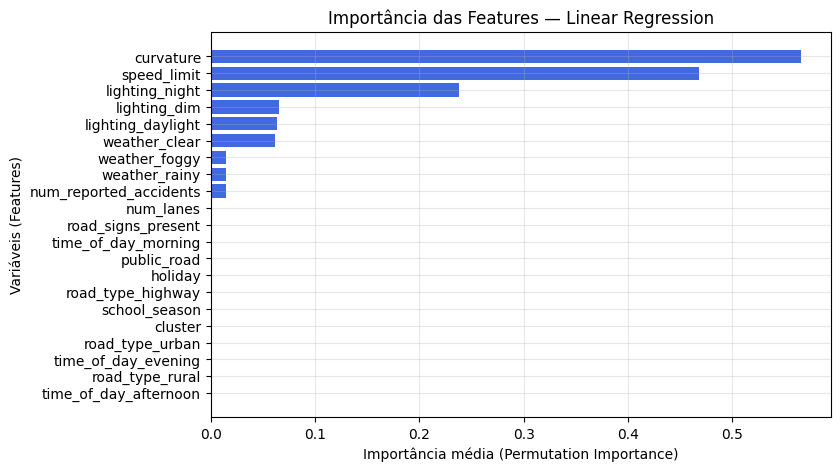

                   Feature    Importance
1                curvature  5.662611e-01
2              speed_limit  4.679569e-01
13          lighting_night  2.380707e-01
12            lighting_dim  6.497016e-02
11       lighting_daylight  6.309713e-02
14           weather_clear  6.188145e-02
15           weather_foggy  1.503887e-02
16           weather_rainy  1.488100e-02
7   num_reported_accidents  1.417447e-02
0                num_lanes  3.217642e-05
3       road_signs_present  2.551022e-05
19     time_of_day_morning  1.873641e-05
4              public_road  1.167856e-05
5                  holiday  1.362524e-06
8        road_type_highway  1.053981e-07
6            school_season -4.581111e-07
20                 cluster -6.083074e-07
10         road_type_urban -2.810833e-06
18     time_of_day_evening -4.474108e-06
9          road_type_rural -4.847736e-06
17   time_of_day_afternoon -4.902814e-06


In [89]:
# 🖼️ Plotar gráfico de barras
plt.figure(figsize=(8, 5))
plt.barh(importances["Feature"], importances["Importance"], color="royalblue")
plt.xlabel("Importância média (Permutation Importance)")
plt.ylabel("Variáveis (Features)")
plt.title("Importância das Features — Linear Regression")
plt.gca().invert_yaxis()  # Inverter eixo para mostrar a mais importante no topo
plt.grid(alpha=0.3)
plt.show()

# 📋 Exibir tabela
print(importances)

# Creation of spreadsheets for creating forecasting models.

In [90]:
test = test[['id','curvature','speed_limit','lighting_night','lighting_dim','lighting_daylight','weather_clear','weather_foggy','weather_rainy','num_reported_accidents']]

In [91]:
train = train[['id','curvature','speed_limit','lighting_night','lighting_dim','lighting_daylight','weather_clear','weather_foggy','weather_rainy','num_reported_accidents', 'accident_risk']]

In [92]:
test.to_csv('/kaggle/working/test_eda_predict_road_accident_risk_v2_feature_importance.csv')

In [93]:
train.to_csv('/kaggle/working/eda_predict_road_accident_risk_v2_feature_importance.csv')

Para organização e equilíbrio do uso dos recursos computacionais. Normalmente executo em 3 fases e crio um notebook para cada fase. Análise Exploratória dos dados, Execução dos modelos e Validação e submissão.Aqui finalizamos a parte da análise exploratória de dados. No link abaixo continuamos o trabalho com a parte de criação estratégica de modelos preditivos no link abaixo:

https://www.kaggle.com/code/makrrc/predicting-road-accident-risk-predict-v6



To organize and balance the use of computing resources, I typically execute the process in three phases and create a notebook for each phase: Exploratory Data Analysis, Model Execution, and Validation and Submission. This concludes the exploratory data analysis phase. We continue our work with the strategic creation of predictive models at the link below:

https://www.kaggle.com/code/makrrc/predicting-road-accident-risk-predict-v6